In [1]:
import pandas as pd
import sqlite3
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline

conn = sqlite3.connect('data/im.db')
cur = conn.cursor()

rt_info = pd.read_csv('data/rt.movie_info.tsv', sep='\t', index_col=0)
rt_info.head(10)

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures
10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN


In [6]:
rt_info.columns

Index(['synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date',
       'dvd_date', 'currency', 'box_office', 'runtime', 'studio'],
      dtype='object')

In [12]:
rt_reviews = pd.read_csv('data/rt.reviews.tsv', sep='\t', encoding='windows-1252', index_col=0)

In [11]:
rt_reviews.head(10)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
5,3,... Cronenberg's Cosmopolis expresses somethin...,NaN,fresh,Michelle Orange,0,Capital New York,"September 11, 2017"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
8,3,"Cronenberg's cold, exacting precision and emot...",NaN,fresh,Sean Axmaker,0,Parallax View,"March 24, 2013"
9,3,Over and above its topical urgency or the bit ...,NaN,fresh,Kong Rithdee,0,Bangkok Post,"March 4, 2013"


In [94]:
q= """
SELECT movie_basics.genres AS Category,movie_ratings.averagerating AS Rating,movie_ratings.numvotes as NumberVotes
  FROM movie_basics
  INNER JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
  WHERE movie_ratings.numvotes >= 700000 AND movie_ratings.averagerating >=8.1
  GROUP BY movie_basics.genres
  ORDER BY Rating  DESC
;
"""
#AND movie_ratings.averagerating >=8.2
df=pd.read_sql(q, conn)
df 

,Category,Rating,NumberVotes
0,"Adventure,Drama,Sci-Fi",8.6,1299334
1,"Drama,Western",8.4,1211405
2,"Action,Thriller",8.4,1387769
3,"Biography,Crime,Drama",8.2,1035358
4,"Mystery,Thriller",8.1,1005960
5,"Drama,Mystery,Thriller",8.1,761592
6,"Action,Adventure,Sci-Fi",8.1,780910
7,"Action,Adventure,Comedy",8.1,948394


In [91]:
df2 = df.set_index("Category")
df2

,Rating,NumberVotes
Category,,
"Adventure,Drama,Sci-Fi",8.6,1299334
"Drama,Western",8.4,1211405
"Action,Thriller",8.4,1387769
"Biography,Crime,Drama",8.2,1035358
"Mystery,Thriller",8.1,1005960
"Drama,Mystery,Thriller",8.1,761592
"Action,Adventure,Sci-Fi",8.1,780910
"Action,Adventure,Comedy",8.1,948394
"Action,Adventure,Fantasy",8.0,784780


In [63]:
subset=list(df.index)
subset

['Action,Adventure,Sci-Fi',
 'Adventure,Drama,Sci-Fi',
 'Biography,Comedy,Drama',
 'Drama,Western',
 'Action,Thriller',
 'Adventure,Animation,Comedy',
 'Biography,Crime,Drama']

In [42]:
plot_df = df.stack().reset_index()
plot_df.columns = ['Rating', 'Number of votes', "Category"]
plot_df.head(3)

,Rating,Number of votes,Category
0,0,Category,"Action,Adventure,Sci-Fi"
1,0,Rating,8.8
2,0,NumberVotes,1841066


Text(0.5, 1.0, 'Budget for each movie')

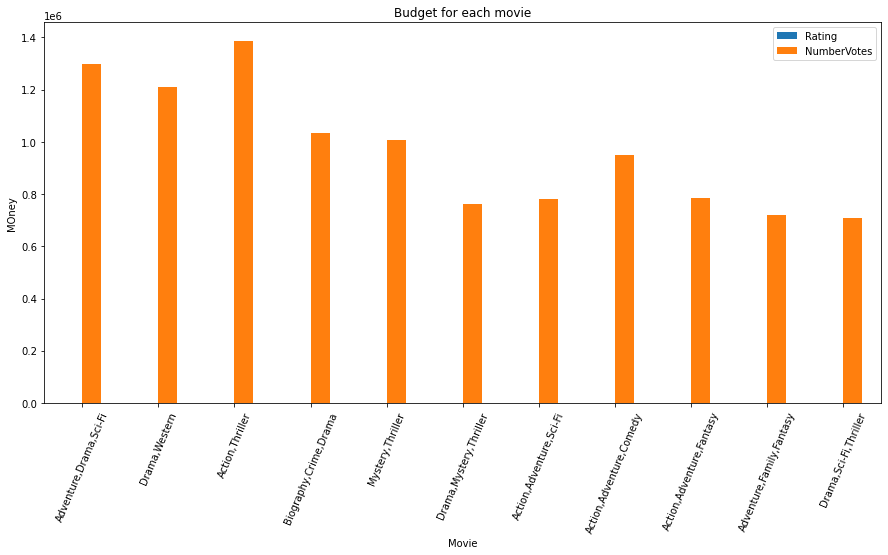

In [95]:
# def addlabels(x,y):
#     for i in range(len(x)):
#         plt.text(i, y[i], y[i], ha = 'center')
        
# addlabels(df2["Rating"], df2["NumberVotes"])
df2.plot.bar(figsize=(15,7))
plt.xticks(rotation=67)
plt.xlabel('Movie')
plt.ylabel('MOney')
plt.title('Budget for each movie')

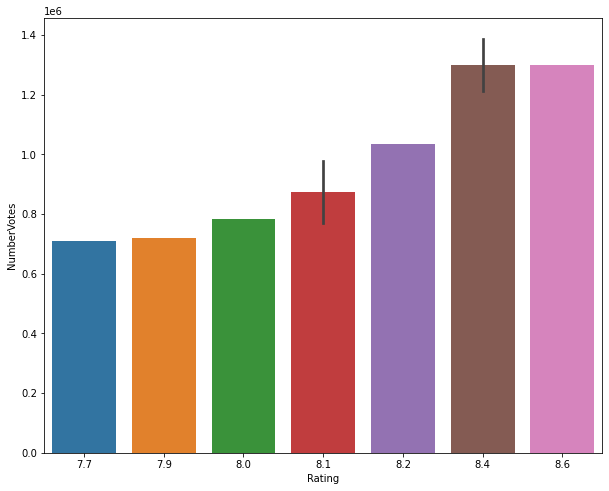

In [93]:

fig= plt.subplots(figsize=(10, 8))
sbn.barplot(x="Rating", y="NumberVotes", data = df)
subset=list(df.index)
#plt.xticks(rotation=60)
plt.show()